In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [38]:
df = pd.read_csv('hw4_data.csv')

In [39]:
df.head(10)

,model_output,prediction,true_class
0,6.039733,1,1
1,2.450787,0,0
2,2.417883,0,1
3,-0.451535,0,0
4,1.173396,0,0
5,0.056909,0,1
6,0.129217,0,0
7,-1.312977,0,0
8,6.604656,1,1
9,1.071714,0,0


In [7]:
model_output = df['model_output'].to_numpy()
prediction=df['prediction'].to_numpy()
true_class=df['true_class'].to_numpy()

In [8]:
# Counting TP, FP, TN, FN
TP = df[(df['prediction'] == 1) & (df['true_class'] == 1)].shape[0]
FP = df[(df['prediction'] == 1) & (df['true_class'] == 0)].shape[0]
TN = df[(df['prediction'] == 0) & (df['true_class'] == 0)].shape[0]
FN = df[(df['prediction'] == 0) & (df['true_class'] == 1)].shape[0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

True Positives (TP): 26
False Positives (FP): 3
True Negatives (TN): 150
False Negatives (FN): 21


In [12]:
# Calculating precision and recall
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

print("Precision:", np.round(precision,2))
print("Recall:", np.round(recall,2))

Precision: 0.9
Recall: 0.55


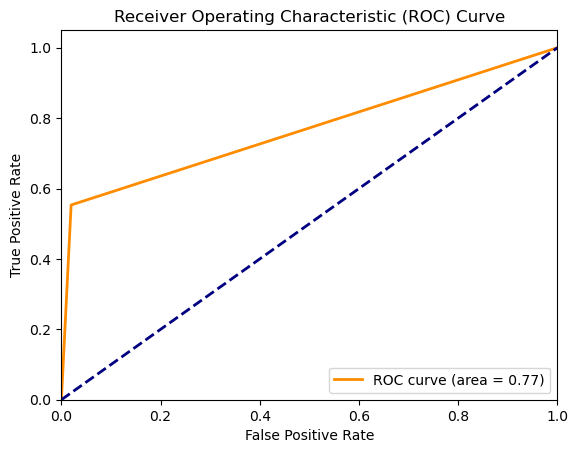

In [17]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(true_class, prediction)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [43]:

df_sorted = df.sort_values(by='model_output', ascending=False)

min_fpr = 1.0
min_threshold = None

total_positives = df['true_class'].sum()
for index, row in df_sorted.iterrows():
    if row['true_class'] == 1:
        total_positives -= 1
    else:
        fp = row.name + 1  # Index starts from 0, hence adding 1
        # Calculate False Positive Rate (FPR)
        fpr = fp / (len(df) - total_positives)
        # Check if TPR is at least 90%
        if total_positives / df['true_class'].sum() >= 0.9:
            # Update minimum FPR and corresponding threshold
            if fpr < min_fpr:
                min_fpr = fpr
                min_threshold = row['model_output']
            break

print("Minimum False Positive Rate:", min_fpr)

Minimum False Positive Rate: 1.0
